Atividade 3.4 da disciplina RNA e Deep Learning

Aluna: Eveline Cavalcanti Feliciano Pontual

# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [3]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 20.6MB/s]


Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 644kB/s]


Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 5.56MB/s]


Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.26MB/s]

Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw



Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [4]:
print('Número de minibatches de treinamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de treinamento: 600


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [5]:
model = torch.nn.Linear(28*28, 10)

In [6]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 1.1347,  0.4125,  0.5998, -0.1112, -1.1709, -0.3943, -0.3855, -0.8390,
          1.0598, -0.2927]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [7]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [8]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [9]:
print('Final loss:', loss.data)

Final loss: tensor(0.3063)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

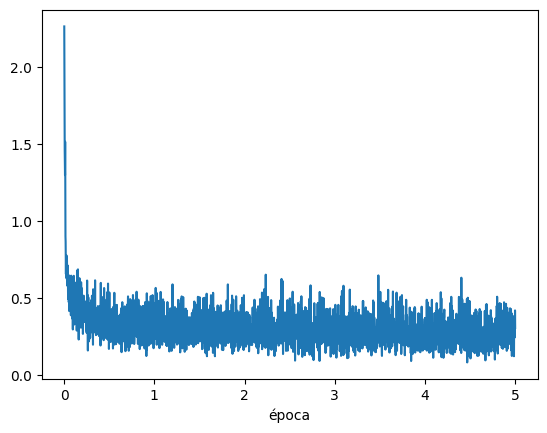

In [10]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

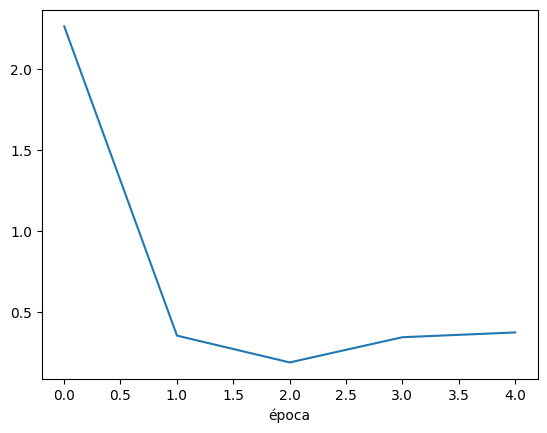

In [11]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

**1. Qual é o tamanho do mini-batch?**

O tamanho do mini-batch em aprendizado de máquina refere-se ao número de amostras de dados que são processadas em conjunto durante uma única iteração do algoritmo de treinamento. O tamanho é 100.

**2. Em uma época, quantos mini-batches existem?**

Em uma época, há 600 mini-batches.

**3. Qual é a definição de época?**

Época é uma passagem completa por todos os dados de treinamento.O treinamento geralmente envolve várias épocas. Também haverá a avaliação desses dados pelo modelo,seja diretamente ou em mini-betches. Após o cálculo da perda, os pesos da rede são atualizados. E a cada época, o modelo ajusta seus parâmetros para melhorar a precisão nas previsões.




## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

Número de minibatches de treinamento: 6000
Época: 1/4, batch: 6000
Final da época 1/4 - Perda final: 0.05050495266914368
Época: 2/4, batch: 6000
Final da época 2/4 - Perda final: 0.2781725823879242
Época: 3/4, batch: 6000
Final da época 3/4 - Perda final: 0.1095244288444519
Época: 4/4, batch: 6000
Final da época 4/4 - Perda final: 0.4464751183986664


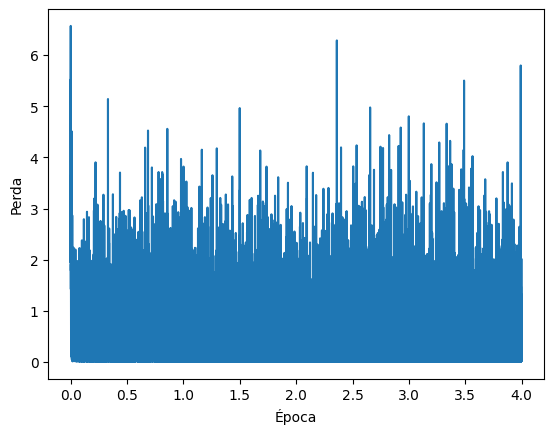

In [12]:
#Batch_size = 10 (Primeiro treinamento)

# Novo valor para batch_size
batch_size = 10

# Definindo o DataLoader com o novo batch_size
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

# Número de minibatches de treinamento (agora com o novo batch_size)
n_batches_train = len(loader_train)
print('Número de minibatches de treinamento:', n_batches_train)

# Definindo o modelo
model = torch.nn.Linear(28*28, 10)

# Configurações de treinamento
n_epochs = 4  # Número de épocas
learningRate = 0.5

# CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente (SGD)
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

# Inicializando listas para armazenar progresso
epochs = []
losses = []

total_samples = len(dataset_train)
total_trained_samples = 0

# Loop de treinamento
for epoch in range(n_epochs):
    for batch_idx, (x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão (flattening)
        inputs = Variable(x_train.view(-1, 28 * 28))

        # Forward pass (previsão)
        outputs = model(inputs)

        # Calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # Gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

    # Print no final de cada época (apenas uma vez por época)
    print(f'Época: {epoch + 1}/{n_epochs}, batch: {n_batches_train}')

    # Print no final de cada época (perda final dessa época)
    print(f'Final da época {epoch + 1}/{n_epochs} - Perda final: {loss.data}')

# Plot dos valores de perda por época
plt.plot(epochs, losses)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.show()

Número de minibatches de treinamento: 600
Época: 1/4, batch: 600
Final da época 1/4 - Perda final: 0.3518093526363373
Época: 2/4, batch: 600
Final da época 2/4 - Perda final: 0.2505938708782196
Época: 3/4, batch: 600
Final da época 3/4 - Perda final: 0.19217845797538757
Época: 4/4, batch: 600
Final da época 4/4 - Perda final: 0.17847396433353424


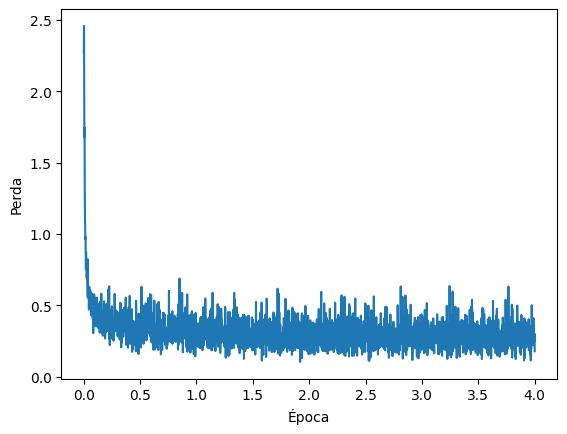

In [13]:
#Batch_size = 100 (Segundo treinamento)

# Novo valor para batch_size
batch_size = 100

# Definindo o DataLoader com o novo batch_size
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

# Número de minibatches de treinamento (agora com o novo batch_size)
n_batches_train = len(loader_train)
print('Número de minibatches de treinamento:', n_batches_train)

# Definindo o modelo
model = torch.nn.Linear(28*28, 10)

# Configurações de treinamento
n_epochs = 4  # Número de épocas
learningRate = 0.5

# CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente (SGD)
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

# Inicializando listas para armazenar progresso
epochs = []
losses = []

total_samples = len(dataset_train)
total_trained_samples = 0

# Loop de treinamento
for epoch in range(n_epochs):
    for batch_idx, (x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão (flattening)
        inputs = Variable(x_train.view(-1, 28 * 28))

        # Forward pass (previsão)
        outputs = model(inputs)

        # Calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # Gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

    # Print no final de cada época (apenas uma vez por época)
    print(f'Época: {epoch + 1}/{n_epochs}, batch: {n_batches_train}')

    # Print no final de cada época (perda final dessa época)
    print(f'Final da época {epoch + 1}/{n_epochs} - Perda final: {loss.data}')

# Plot dos valores de perda por época
plt.plot(epochs, losses)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.show()

Número de minibatches de treinamento: 60
Época: 1/4, batch: 60
Final da época 1/4 - Perda final: 0.45326748490333557
Época: 2/4, batch: 60
Final da época 2/4 - Perda final: 0.40461400151252747
Época: 3/4, batch: 60
Final da época 3/4 - Perda final: 0.35570576786994934
Época: 4/4, batch: 60
Final da época 4/4 - Perda final: 0.3289177417755127


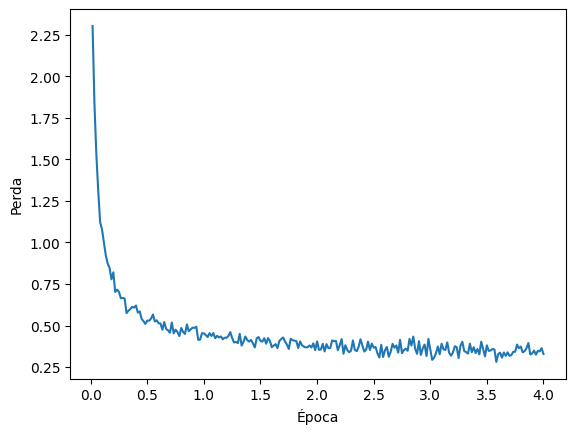

In [14]:
#Batch_size = 1000 (Terceiro treinamento)

# Novo valor para batch_size
batch_size = 1000

# Definindo o DataLoader com o novo batch_size
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

# Número de minibatches de treinamento (agora com o novo batch_size)
n_batches_train = len(loader_train)
print('Número de minibatches de treinamento:', n_batches_train)

# Definindo o modelo
model = torch.nn.Linear(28*28, 10)

# Configurações de treinamento
n_epochs = 4  # Número de épocas
learningRate = 0.5

# CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente (SGD)
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

# Inicializando listas para armazenar progresso
epochs = []
losses = []

total_samples = len(dataset_train)
total_trained_samples = 0

# Loop de treinamento
for epoch in range(n_epochs):
    for batch_idx, (x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão (flattening)
        inputs = Variable(x_train.view(-1, 28 * 28))

        # Forward pass (previsão)
        outputs = model(inputs)

        # Calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # Gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

    # Print no final de cada época (apenas uma vez por época)
    print(f'Época: {epoch + 1}/{n_epochs}, batch: {n_batches_train}')

    # Print no final de cada época (perda final dessa época)
    print(f'Final da época {epoch + 1}/{n_epochs} - Perda final: {loss.data}')

# Plot dos valores de perda por época
plt.plot(epochs, losses)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.show()

## Conclusões sobre os experimentos deste notebook


Após realizar estudos e treinamentos com diferentes tamanhos de minibatches (10, 100 e 1000), foi possível chegar a algumas conclusões:  

**Primeiro Treinamento: Batch_size = 10 e Número de Minibatches = 6000**  
O modelo apresentou uma perda inicial mais alta (0,7197), mas houve uma melhora significativa, estabilizando em 0,1222 após 4 épocas. Contudo, foi observada uma oscilação na perda durante a terceira época, possivelmente indicando um sobreajuste.  

**Segundo Treinamento: Batch_size = 100 e Número de Minibatches = 600**  
Neste caso, a perda inicial foi mais baixa (0,4546) e o desempenho melhorou para 0,1914 após 4 épocas, um valor inferior ao do treinamento anterior. Ainda assim, ocorreram flutuações na perda durante a terceira época, sugerindo novamente sinais de sobreajuste.  

**Terceiro Treinamento: Batch_size = 1000 e Número de Minibatches = 60**  
Com um tamanho maior de batch, o modelo iniciou com uma perda de 0,4446 na primeira época, mostrando um progresso constante e alcançando 0,3266 sem oscilações significativas na perda.  

O comportamento do modelo mostrou-se dependente da quantidade de minibatches. Modelos com maior número de batches (6000) apresentaram convergência mais rápida, embora com flutuações, enquanto aqueles com menos batches (60) evoluíram mais lentamente, mas de forma estável e contínua.  

Treinar modelos de aprendizado de máquina usando todos os dados de uma vez (batch completo) pode ser ineficiente, pois exige muito tempo e memória. Para contornar essa limitação, o treinamento é dividido em minibatches, ou seja, pequenas porções de dados.  

O uso de minibatches é vantajoso porque:  
- **Eficiência computacional**: Reduz a carga de memória e acelera cálculos, como o gradiente, usado para atualizar os parâmetros do modelo.  
- **Atualizações mais frequentes**: O modelo aprende mais rapidamente, pois os pesos são ajustados de maneira contínua.  
- **Redução da variação do gradiente**: A diversidade nos minibatches permite maior estabilidade no processo de treinamento.  
- **Regularização implícita**: Evita que o modelo dependa de uma única direção no cálculo do gradiente, reduzindo as chances de overfitting.  

Assim, utilizar minibatches não apenas otimiza o treinamento, mas também melhora a qualidade e a generalização do modelo.

